Searches and Downloads an image of a bird

(1, 'http://darkroom.baltimoresun.com/wp-content/uploads/2012/11/BlueJay.jpg')


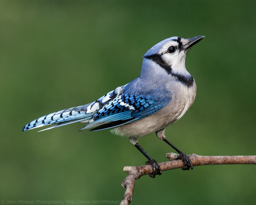

In [27]:
from fastbook import *


urls = search_images_ddg('blue jay photos', max_images=1)
print((len(urls), urls[0]))

dest = Path('lesson1-data/blue-jay.jpg')
if not dest.exists():
    download_url(urls[0], dest)

im = Image.open(dest)
im.to_thumb(256, 256)

https://images.pexels.com/photos/1170986/pexels-photo-1170986.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500


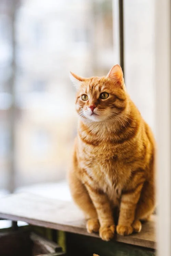

In [29]:
urls = search_images_ddg('cat photos', max_images=1)
print(urls[0])

dest = Path('lesson1-data/cat.jpg')
if not dest.exists():
    download_url(urls[0], dest)

im = Image.open(dest)
im.to_thumb(256, 256)

Downloads 200 bird images and 200 non-bird images

In [31]:

searches = ['bird photos', 'dog photos', 'cat photos']
save_at = Path('lesson1-data/animals')

if not save_at.exists():
    for search in searches:
        dest = (save_at/search)
        dest.mkdir(parents=True, exist_ok=True)
        urls = search_images_ddg(search, max_images=100)
        download_images(dest, urls=urls)
        resize_images(dest, max_size=400, dest=dest)

        failed  = verify_images(get_image_files(dest))
        failed.map(Path.unlink)
        print(f'{search} failed: {len(failed)}')


Image Sample

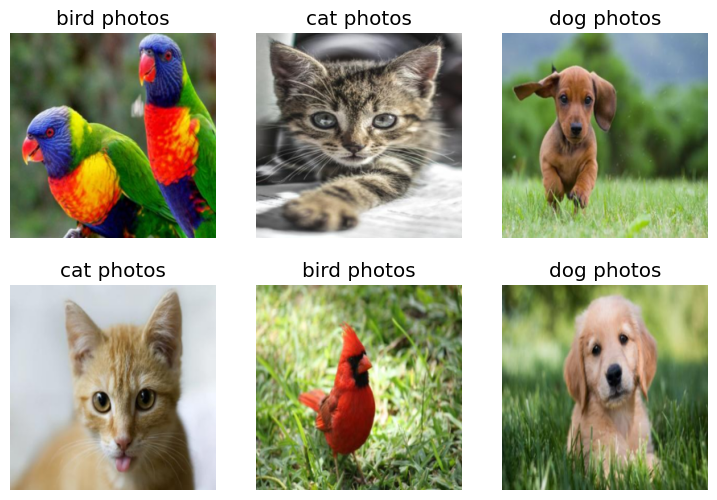

In [23]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256, method='squish')]
).dataloaders(save_at)

dls.show_batch(max_n=6)

Training Model

In [24]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/Users/fabiano/code/personal/hugging-face-course/venv/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/fabiano/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 39.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.557832,0.732399,0.360000,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.233722,0.150770,0.040000,00:14
1,0.137897,0.016798,0.000000,00:07
2,0.097731,0.009696,0.000000,00:08


In [30]:
is_bird,_,probs = learn.predict(PILImage.create(Path('lesson1-data/blue-jay.jpg')))
print(f"Is this a bird?: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.6f}")

is_cat,_,probs = learn.predict(PILImage.create(Path('lesson1-data/cat.jpg')))
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[0]:.6f}")

Is this a bird?: bird photos.
Probability it's a bird: 0.999997


Is this a cat?: cat photos.
Probability it's a cat: 0.000005
